## Evaluate the number of observatories available to follow up an event##

This demonstrates the nFollowStacker, which adds a column indicating how many observatories would be available to follow up an event that occured during that visit (for a user-specified timestep). 
You can then calculate statistics on this new column - such as the average number of observatories available for all visits to a particular region on the sky. 

In [1]:
from __future__ import print_function
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots

In [2]:
# Set the database and query
dbDir = '../../tutorials/'
runName = 'baseline2018a'
opsdb = db.OpsimDatabase(os.path.join(dbDir, runName + '.db'))
outDir = 'FollowUp'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
nFollows = stackers.NFollowStacker(minSize=6.5, airmassLimit=2.0, timeSteps=np.arange(0.5, 6.6, 3.0), 
                                   mjdCol='observationStartMJD', degrees=True)
sqlconstraint = 'night < 10'

plotFuncs = [plots.HealpixSkyMap(), plots.HealpixHistogram()]
slicer = slicers.HealpixSlicer(nside=64)
metric = metrics.MeanMetric('nObservatories')
meanbundle = metricBundles.MetricBundle(metric, slicer, sqlconstraint, stackerList=[nFollows], 
                                        plotFuncs=plotFuncs, runName=runName)
metric = metrics.MaxMetric('nObservatories')
maxbundle = metricBundles.MetricBundle(metric, slicer, sqlconstraint, stackerList=[nFollows], 
                                       plotFuncs=plotFuncs, runName=runName)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [4]:
bgroup = metricBundles.MetricBundleGroup({'mean': meanbundle, 'max': maxbundle}, opsdb, 
                                         outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database SummaryAllProps with constraint night < 10 for columns ['fieldDec', 'fieldRA', 'observationStartMJD']
Found 6850 visits
Running:  ['mean', 'max']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "night < 10" constraint now.


/home/docmaf/repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 560 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.


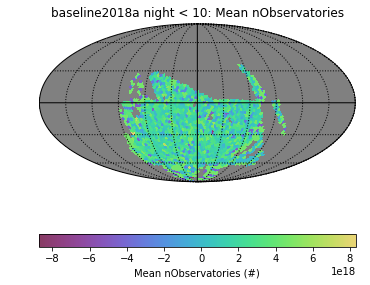

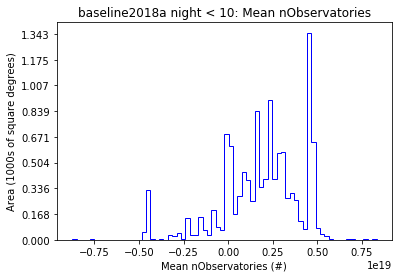

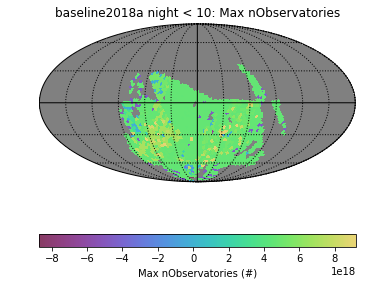

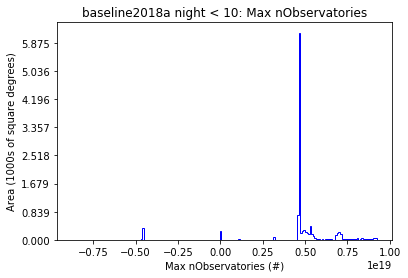

In [5]:
bgroup.plotAll(closefigs=False)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with constraint night < 10 for columns ['observationStartMJD', 'fieldDec', 'altitude', 'azimuth', 'fieldRA']
Found 6850 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 10" constraint now.
monopole: 2.02746e+17  dipole: lon: -51.37, lat: 81.8923, amp: 6.23116e+18
Plotting complete.


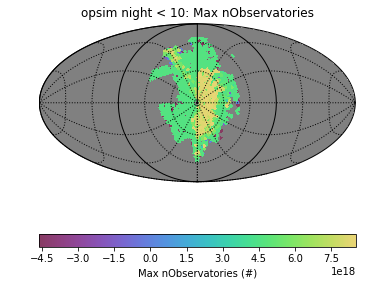

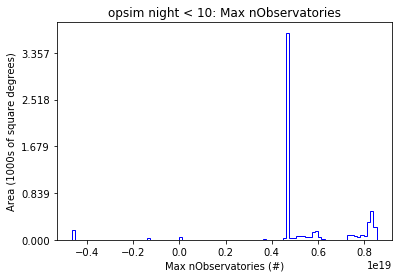

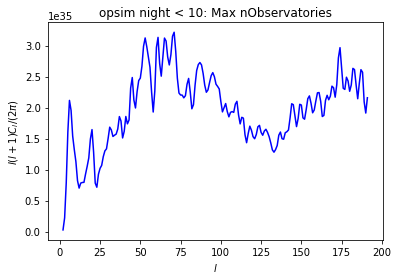

In [6]:
# Change it up to be in alt/az by modifying the stacker.
zenithStacker = stackers.ZenithDistStacker(degrees=True)
slicer = slicers.HealpixSlicer(nside=64, latCol='altitude', lonCol='azimuth', latLonDeg=True, useCache=True)
plotDict = {'rot': (90, 90, 90), 'flip': 'geo'}
bundle = metricBundles.MetricBundle(metric, slicer, sqlconstraint, 
                                    stackerList=[zenithStacker, nFollows], plotDict=plotDict)
bgroup = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with constraint night < 10 for columns ['observationStartMJD', 'fieldDec', 'altitude', 'azimuth', 'fieldRA']
Found 6850 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 10" constraint now.


/home/docmaf/repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 2602 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 8.69636e+17  dipole: lon: -24.0206, lat: 83.9006, amp: 4.03819e+18
Plotting complete.


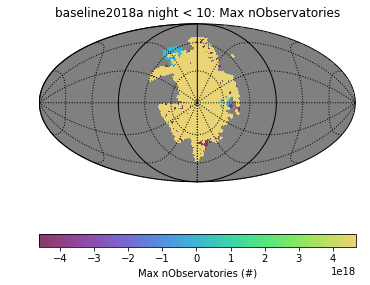

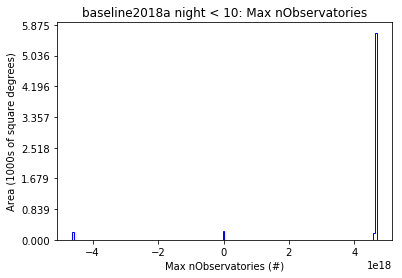

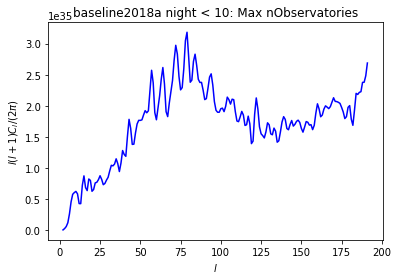

In [7]:
# Let's see what happens with a 24-hour follow-up window
nFollows = stackers.NFollowStacker(minSize=6.5, timeSteps=np.arange(0, 26, 2), airmassLimit=2.0)
zenithStacker = stackers.ZenithDistStacker(degrees=True)
slicer = slicers.HealpixSlicer(nside=64, latCol='altitude', lonCol='azimuth', latLonDeg=True, useCache=True)
plotDict = {'rot': (90, 90, 90), 'flip': 'geo'}
stackerList = [nFollows, zenithStacker]
bundle = metricBundles.MetricBundle(metric, slicer, sqlconstraint, 
                                    runName=runName, stackerList=stackerList, plotDict=plotDict)
bgroup = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)